# CSC 732: Pattern Recognition and Neural Networks
## Spring 2024
## Project 1:
- Deep Learning Architectures for Solving Time-Series Problems Using Python/TensorFlow/PyTorch and Libraries.

## Submitted By
- Muhammed Furkan AVCI, Muhammed Ihsan Corak, Mohammed Rahman
---

# Dataset Used for the Experiment

##  Beijing Air Quality Dataset

This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included. The data's time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as "NA".

## Description

### Variable Information
- No: row number
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- pm2.5: PM2.5 concentration (ug/m^3)
- DEWP: Dew Point (â„ƒ)
- TEMP: Temperature (â„ƒ)
- PRES: Pressure (hPa)
- cbwd: Combined wind direction
- Iws: Cumulated wind speed (m/s)
- Is: Cumulated hours of snow
- Ir: Cumulated hours of rain

The data was collected hourly and the data set has 43,824 rows
and 13 columns. The first column is simply an index and was
ignored for the analysis. The four columns labeled as year,
month, day, and hour, were combined into a single feature
called “datetime”. The ‘PM2.5’ column is the
target variable. All other variables (along with time) were used
as input features for multivariate time series analysis.

The Dataset on the UCI Repository:
- https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data

To access the dataset used in our analyses, please visit the UCI Machine Learning Repository at the following URL: https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv.



## Models used for Beijing Air Quality Time Series Forecasting:
Traditional TFS Model:
  - Autoregressive Integrated Moving Average (ARIMA)

Deep Learning Models:
- Recurrent Neural Networks (RNN)
- Long Short-term Memory (LSTM)
- Gated Recurrent Units (GRU)
- Transformers

We will emphasize on the following things:
- To implement and validate traditional Time Series Forecasting (TSF) model ARIMA.
- To apply and validate deep learning models (RNN, LSTM, GRU, Transformer) for time series forecasting and compare their corresponding performance.
- To assess the strengths and weaknesses of these models.
- To understand the impact of the size of look-back window and the length of time of future predictions on the prediction accuracy.

## Install Libraries

In [17]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.7 MB/s eta 0:00:00


## Imports
- Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import skew

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

## Load the Beijing Air Quality Dataset from UCI Website

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Exploratory data analysis (EDA) and Preprocessing

## Print the first few rows of the dataset

In [ ]:
print(data.head(10))

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
5   6  2010      1    1     5    NaN   -19 -10.0  1017.0   NW  16.10   0   0
6   7  2010      1    1     6    NaN   -19  -9.0  1017.0   NW  19.23   0   0
7   8  2010      1    1     7    NaN   -19  -9.0  1017.0   NW  21.02   0   0
8   9  2010      1    1     8    NaN   -19  -9.0  1017.0   NW  24.15   0   0
9  10  2010      1    1     9    NaN   -20  -8.0  1017.0   NW  27.28   0   0


## Print the last few rows of the dataset

In [ ]:
print(data.tail(10))

          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
43814  43815  2014     12   31    14    9.0   -27   1.0  1032.0   NW  196.21   
43815  43816  2014     12   31    15   11.0   -26   1.0  1032.0   NW  205.15   
43816  43817  2014     12   31    16    8.0   -23   0.0  1032.0   NW  214.09   
43817  43818  2014     12   31    17    9.0   -22  -1.0  1033.0   NW  221.24   
43818  43819  2014     12   31    18   10.0   -22  -2.0  1033.0   NW  226.16   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir  
43814   0   0  
43815   0   0  
43816   0   0  
43817   0   0  
43818   0   0  
43819   0   0  
43820  

## Show the names of the columns in the Dataset

In [ ]:
print(data.columns.values)

['No' 'year' 'month' 'day' 'hour' 'pm2.5' 'DEWP' 'TEMP' 'PRES' 'cbwd'
 'Iws' 'Is' 'Ir']


## Print the shape of the dataset

In [ ]:
print(data.shape)

(43824, 13)


## Analysis:
In this case, the output (43824, 13) means that the dataset has 43,824 rows and 13 columns.

## Displaying Summary Information of a Dataset

In [ ]:
# info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB
None


## Count of unique values for each column

In [ ]:
print(data.nunique())

No       43824
year         5
month       12
day         31
hour        24
pm2.5      581
DEWP        69
TEMP        64
PRES        60
cbwd         4
Iws       2788
Is          28
Ir          37
dtype: int64


## Summary statistics

In [ ]:
# summary statistics
print(data.describe())

                 No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   
75%    32868.250000   2013.000000     10.000000     23.000000     17.250000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES           Iws  \
count  41757.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.613215      1.817246     12.448521   1016.447654     23.889140   
std       92.050387     14.433440     12.198613    

# Count the number of occurrences of each unique value in the 'cbwd' column
- We will implement One-hot encoding for categorical feature 'cbwd' later

In [ ]:
print(data['cbwd'].value_counts())

cbwd
SE    15290
NW    14150
cv     9387
NE     4997
Name: count, dtype: int64


## Checking Column with missing values

In [ ]:
print(data.isnull().sum())

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


## Handle missing values and Check for missing values again


In [ ]:
# Forward fill
data.fillna(method='ffill', inplace=True)

# Backward fill for any remaining missing values after forward fill
data.fillna(method='bfill', inplace=True)

# If there are still any missing values, fill them with the median
if data['pm2.5'].isnull().sum() > 0:
    data['pm2.5'].fillna(data['pm2.5'].median(), inplace=True)

# Checking for missing values again
print(data.isnull().sum())

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


## Using a histogram, check the data distribution of the 'pm2.5' column values.

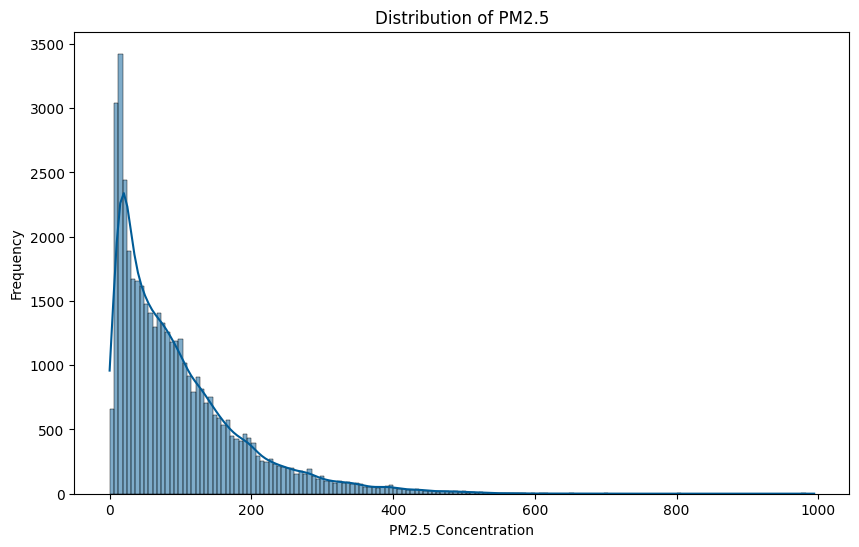

In [ ]:
# Histogram for the 'pm2.5' variable
plt.figure(figsize= (10, 6))
sns.histplot(data['pm2.5'], color = '#005b96', kde= True);
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()


## Calculate the skewness of the distribution of the 'pm2.5' column

In [ ]:
print(data['pm2.5'].skew())

1.8234409845776247


## Analysis:
The skewness value of approximately 1.82 for the pm2.5 column indicates a right-skewed (or positively skewed) distribution. This suggests that the bulk of the pollution data is concentrated on the lower side of the scale (lower pollution levels), with a tail extending towards higher pollution levels.

Our target variable is clearly skewed. Therefore we will apply transformation to it later

## Combine year, month, day, and hour into a single datetime column

In [ ]:
# Combine year, month, day, and hour into a single datetime column
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Set the datetime as the index
data.set_index('datetime', inplace=True)

# Drop columns that won't be used
data.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)

# Print the first few rows of the dataset
print(data.head())

                     pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
datetime                                                          
2010-01-01 00:00:00  129.0   -21 -11.0  1021.0   NW   1.79   0   0
2010-01-01 01:00:00  129.0   -21 -12.0  1020.0   NW   4.92   0   0
2010-01-01 02:00:00  129.0   -21 -11.0  1019.0   NW   6.71   0   0
2010-01-01 03:00:00  129.0   -21 -14.0  1019.0   NW   9.84   0   0
2010-01-01 04:00:00  129.0   -20 -12.0  1018.0   NW  12.97   0   0


## Seperate datetimes and columns for future plotting

In [ ]:
# Access datetimes for future plotting (since it's the index)
train_datetimes = data.index

# Print the datetimes to verify
print(train_datetimes)

# Variables/Features/Columns for training
cols_for_training = [col for col in data.columns if col != 'cbwd']

# 'datetime' and 'cbwd' columns are not used in training.
print(cols_for_training)

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=43824, freq=None)
['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']


## Show the names of the columns in the Dataset after modification

In [ ]:
print(data.columns.values)

['pm2.5' 'DEWP' 'TEMP' 'PRES' 'cbwd' 'Iws' 'Is' 'Ir']


## Plot heatmap

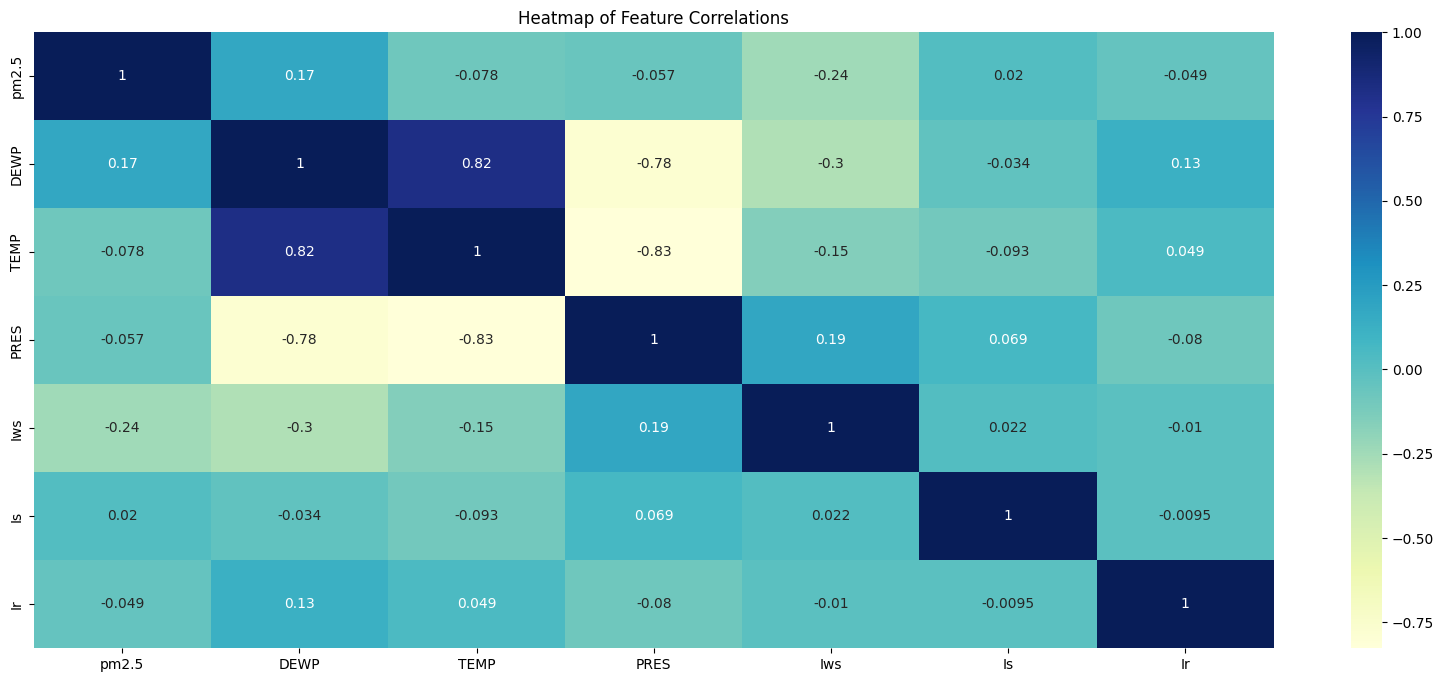

In [ ]:
# Calculate correlations
correlation_matrix = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize= (20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Feature Correlations')
plt.show()

## Plotting histograms

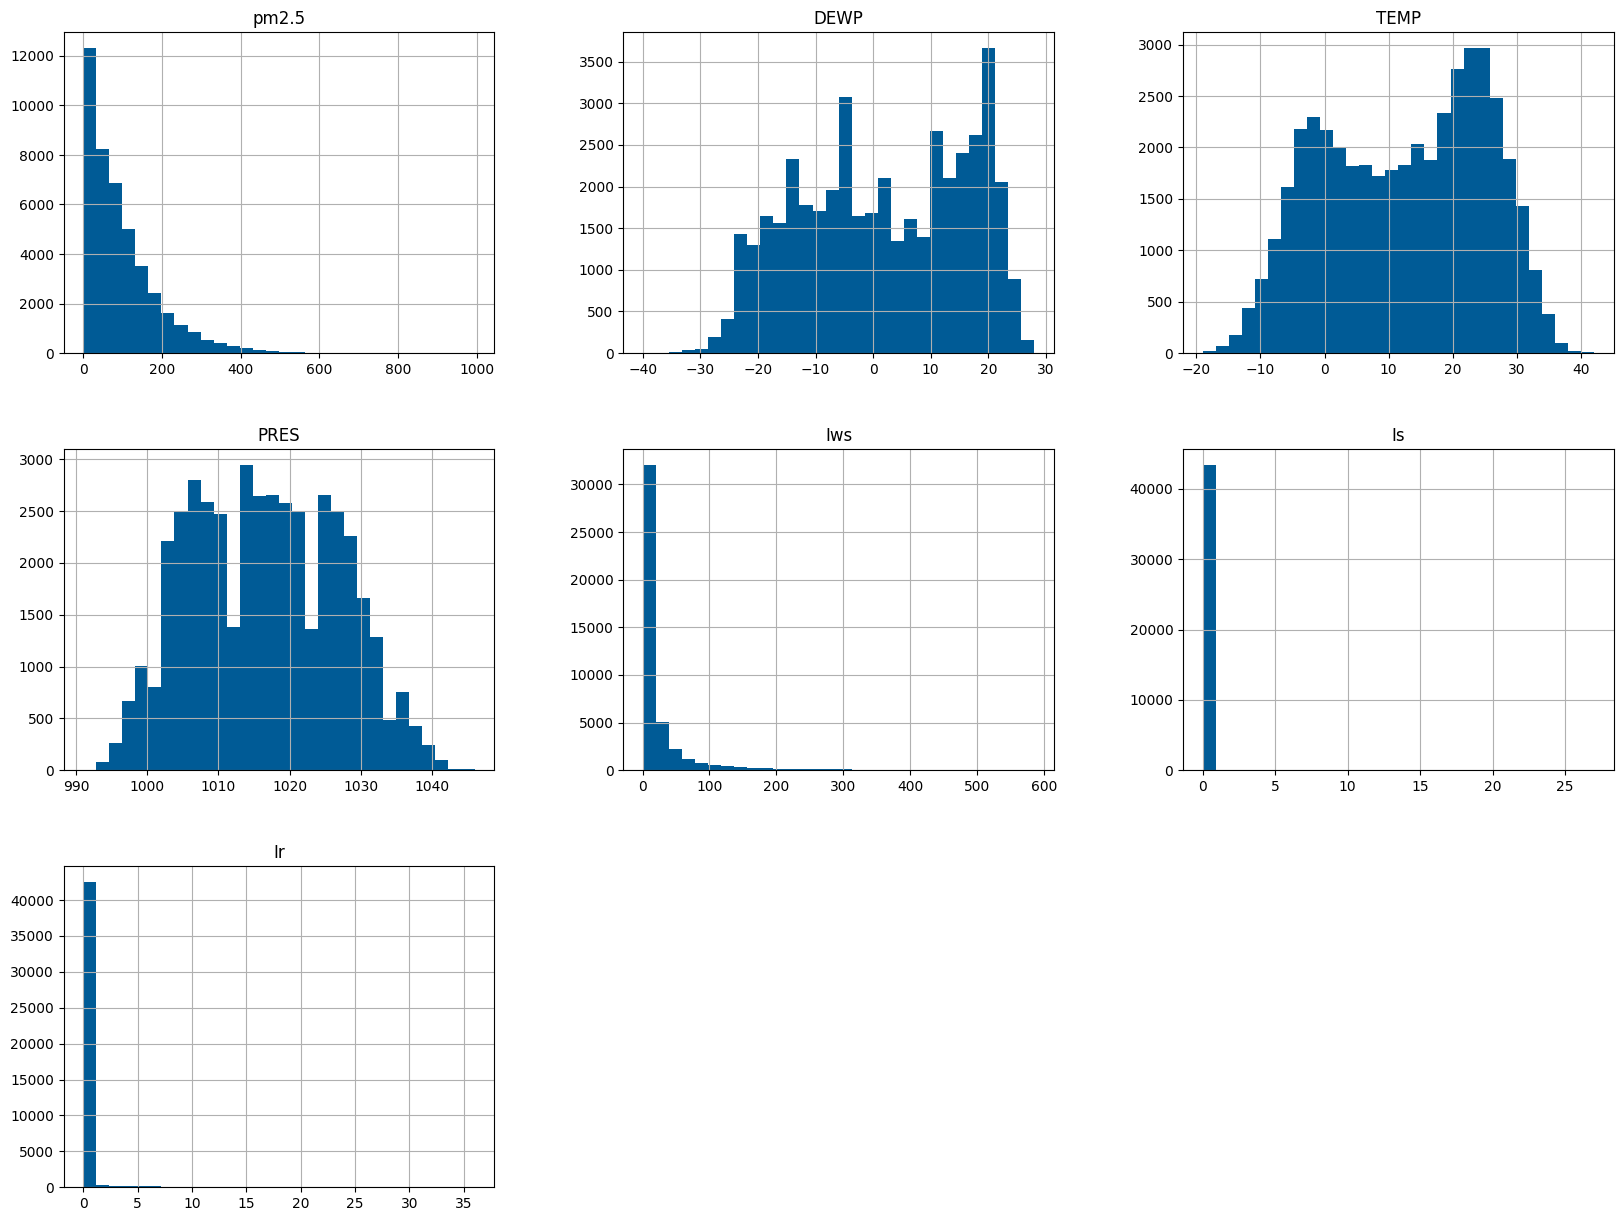

In [ ]:
# Plot histograms
data.hist(bins = 30, figsize=(20, 15), color = '#005b96');

## Analysis:
We can clearly see that lot of our features are skewed. Therefore, we will have to deal with it later when we will do feature transformation. But we will always have to ensure to inverse-transform the predictions to maintain interpretability.

## Check the categorical variable

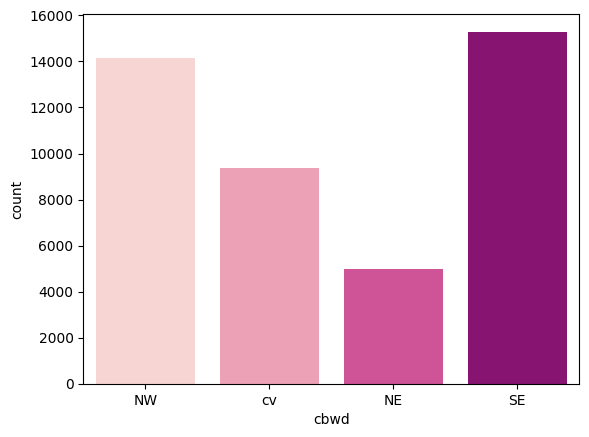

In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    sns.countplot(x=data['cbwd'], palette='RdPu')

## Encoding
- One-hot encoding for categorical 'cbwd' feature

In [ ]:
# One-hot encoding for categorical 'cbwd' feature
cbwd_encoded = pd.get_dummies(data['cbwd'], prefix='cbwd')
data = pd.concat([data, cbwd_encoded], axis=1).drop(['cbwd'], axis=1)

## Plot Input and Target Features

## Plot the time series for all input and target features except for 'datetime' and ‘cbwd.’

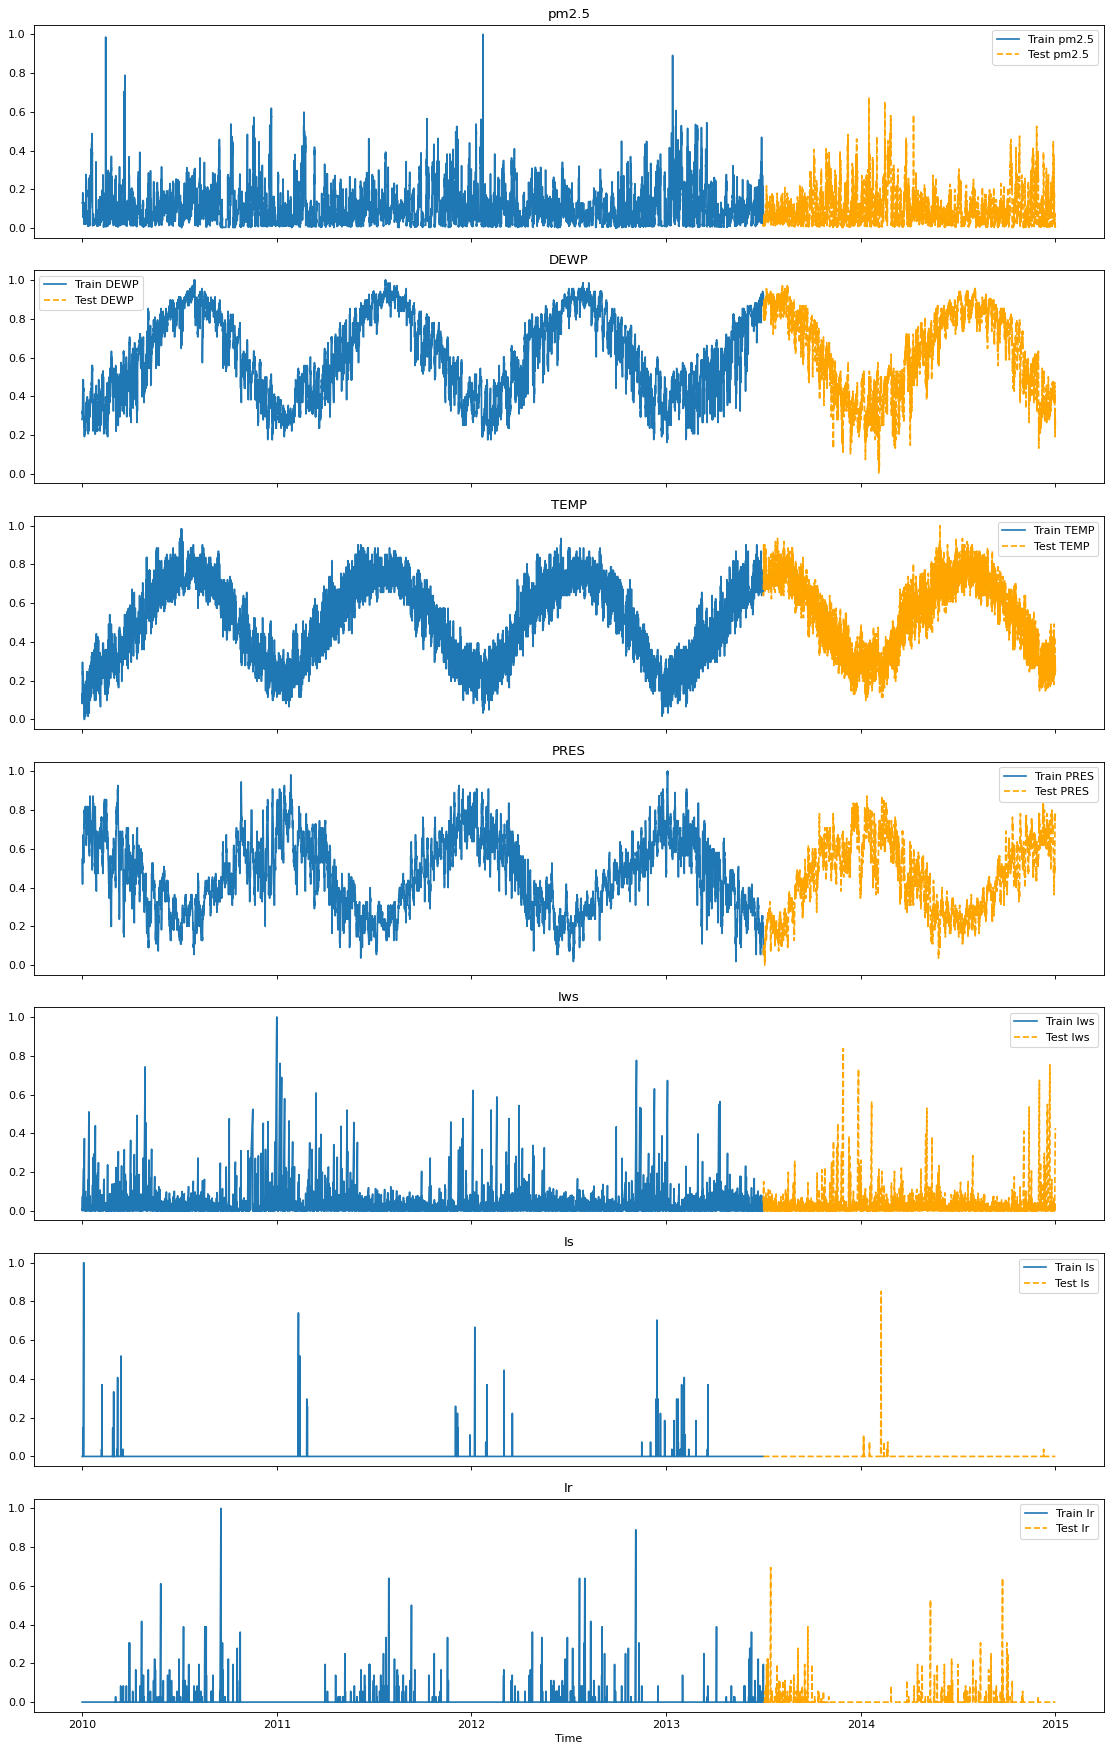

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Handle missing values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Drop rows if there are still any NAs left
data.dropna(inplace=True)

# Combine year, month, day, and hour into a datetime column (done implicitly by setting them as index)
data.index = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Drop columns that are not needed anymore
data.drop(columns=['No', 'year', 'month', 'day', 'hour', 'cbwd'], inplace=True)

# Normalize the data with Min-Max scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Divide the data into training and testing sets (70% train, 30% test)
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data.iloc[:train_size]
test_data = scaled_data.iloc[train_size:]

# Plot the time series for all features except 'cbwd'
features_to_plot = [feature for feature in scaled_data.columns if feature != 'cbwd']
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(14, 22), dpi=80, sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(train_data.index, train_data[feature], label=f'Train {feature}')
    axes[i].plot(test_data.index, test_data[feature], label=f'Test {feature}', color='orange', linestyle='--')
    axes[i].set_title(feature)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()


## Analysis:


The plots display the normalized values of various features from the Beijing Air Quality dataset over time, with a clear demarcation between the training set and the test set. The features include PM2.5 concentration levels and several meteorological variables such as dew point temperature (DEWP), temperature (TEMP), pressure (PRES), and others related to wind speed and direction.

The PM2.5 plot shows a significant number of spikes in the training data, indicating episodes of high pollution levels, which appear to be less frequent or prominent in the test data. This could be due to different time frames or changes in environmental policies or conditions.

The DEWP, TEMP, and PRES plots exhibit seasonal patterns, as indicated by the repeating cycles in both the training and test data. The seasonality is a common characteristic in environmental data due to changes in weather across different times of the year.

The remaining plots representing wind speed and other variables show some regular patterns in the training set, which seem less pronounced in the test set. This may suggest either a change in conditions during the test period or perhaps less variation in these features compared to the training period.

These visualizations are valuable for understanding the underlying patterns and trends in the data, which can be crucial for tasks such as forecasting air quality or analyzing the impact of weather conditions on pollution levels. The clear separation of training and test data also helps validate the performance of predictive models by ensuring they can generalize to unseen data effectively.

# Exploratory Analysis of Traditional Time Series Forecasting (TSF) Models:
- ARIMA model
- SARIMAX model


### Visualization and ARIMA Forecasting of Beijing Air Quality Dataset
- The primary objective of the code, which is to forecast PM2.5 particulate matter levels, indicating that it utilizes time series forecasting methods and specifically employs the ARIMA model for this purpose.
- Find the best ARIMA parameters for the Beijing Air Quality dataset's 'pm2.5' variable, and then forecast using the best ARIMA model

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-140574.946, Time=1.87 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-35165.941, Time=1.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-139277.651, Time=1.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-71482.674, Time=1.49 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-140572.991, Time=4.75 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-140570.383, Time=1.83 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-95206.944, Time=3.88 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-140496.583, Time=1.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-140576.403, Time=1.83 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-140616.465, Time=1.69 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-140545.744, Time=7.85 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-140734.836, Time=13.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-140625.197, Time=1.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-141026.479, Time=59

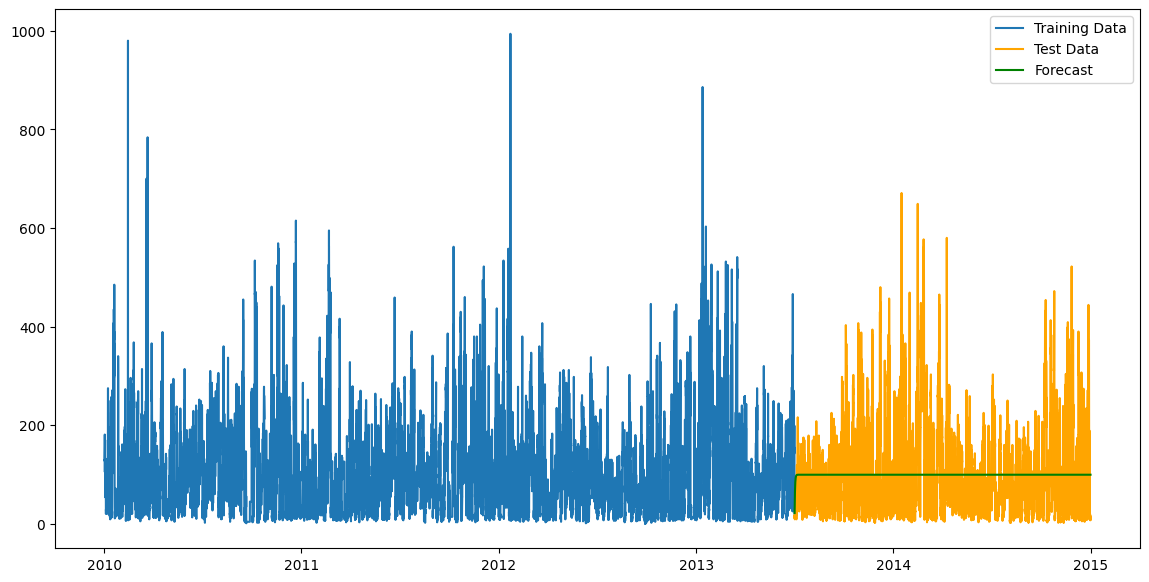

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

# Light background style for matplotlib
plt.style.use('default')

# Load and preprocess the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Handle missing values with forward fill and backward fill
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Combine year, month, day, and hour into a single datetime column
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Set the datetime as the index and drop unnecessary columns
data.set_index('datetime', inplace=True)
data.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)

# Scale the 'pm2.5' feature with MinMaxScaler
scaler = MinMaxScaler()
pm25_scaled = scaler.fit_transform(data[['pm2.5']])

# Divide the scaled data into training set (first 70%) and test set (last 30%)
train_size = int(len(pm25_scaled) * 0.7)
train_pm25 = pm25_scaled[:train_size]
test_pm25 = pm25_scaled[train_size:]

# Use pmdarima.auto_arima to find the best ARIMA model parameters
auto_arima_model = pm.auto_arima(train_pm25, start_p=1, start_q=1,
                                 test='adf',       # use adftest to find optimal 'd'
                                 max_p=3, max_q=3, # maximum p and q
                                 m=1,              # frequency of series
                                 d=None,           # let model determine 'd'
                                 seasonal=False,   # No Seasonality
                                 start_P=0,
                                 D=0,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

print(auto_arima_model.summary())

# Fit the ARIMA model on the training set with the best-found parameters using more iterations and different solver
model = ARIMA(train_pm25, order=auto_arima_model.order)
model_fit = model.fit()


# Forecast the test set
forecast = model_fit.forecast(steps=len(test_pm25))

# Rescale the forecast back to the original pm2.5 values
forecast_rescaled = scaler.inverse_transform(forecast.reshape(-1, 1))

# Calculate MAE and RMSE using the test set and the rescaled forecast
mae = mean_absolute_error(scaler.inverse_transform(test_pm25), forecast_rescaled)
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_pm25), forecast_rescaled))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the original data, test data, and forecasted values
plt.figure(figsize=(14,7))
plt.plot(data.index[:train_size], scaler.inverse_transform(train_pm25), label='Training Data')
plt.plot(data.index[train_size:], scaler.inverse_transform(test_pm25), label='Test Data', color='orange')
plt.plot(data.index[train_size:], forecast_rescaled, label='Forecast', color='green')
plt.legend()
plt.show()


## Analysis:
The ARIMA(3,0,2) model with intercept appears to be a well-fitted model according to the given AIC value, which is a common measure used to compare models on the basis of their fit while penalizing for increased complexity. The fact that the AIC is negative and the model's log-likelihood is positive suggests that the model is performing well statistically. However, the forecast plot displaying a horizontal line may indicate a few things:

- Static Forecast: If the forecast is a straight line, it suggests that the model predicts the same value for each future time step. This can happen if the model does not capture the time-series dynamics well enough or if it overfits to noise, despite the statistical indicators suggesting a good fit.
- Plotting Issue: It might be a technical issue related to how the plot was generated. It's possible that the forecasted values were not correctly plotted against their corresponding future time points, or the plot range did not properly display the variations in the forecasted values.
- Data Characteristics: If the time-series data have very little variance or change in the later part, the model might deduce that the best prediction is the average of the historical values, resulting in a flat forecast line.
- Inadequate Model Complexity: While ARIMA models are robust, there might be non-linear patterns, seasonalities, or other dynamics in the data that a basic ARIMA model cannot capture, necessitating more complex models or methodologies.

To properly evaluate the model's forecast, we must look at the actual forecasted values and see how they vary over time. It's also important to consider re-evaluating the model's parameters, potentially exploring more complex models like SARIMA, which includes seasonal components, or even machine learning-based approaches if the data exhibit complex non-linear patterns. Additionally, inspecting the residuals of the model (the differences between the observed values and the model's predictions) can give insights into whether there are patterns the model failed to capture.

### Short-Term PM2.5 Concentration Forecasting Using Simplified SARIMAX Model

- The program below focuses on forecasting PM2.5 levels, notes the short-term nature of the predictions, and mentions the use of a simplified SARIMAX model, implying that it does not use the full auto_arima process for parameter selection

                                     SARIMAX Results                                      
Dep. Variable:                              pm2.5   No. Observations:                43728
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -199813.639
Date:                            Fri, 19 Apr 2024   AIC                         399637.277
Time:                                    21:50:56   BIC                         399680.703
Sample:                                01-01-2010   HQIC                        399650.966
                                     - 12-27-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0320      0.006     -5.342      0.000      -0.044      -0.020
ma.L1          0.2160      0.006   

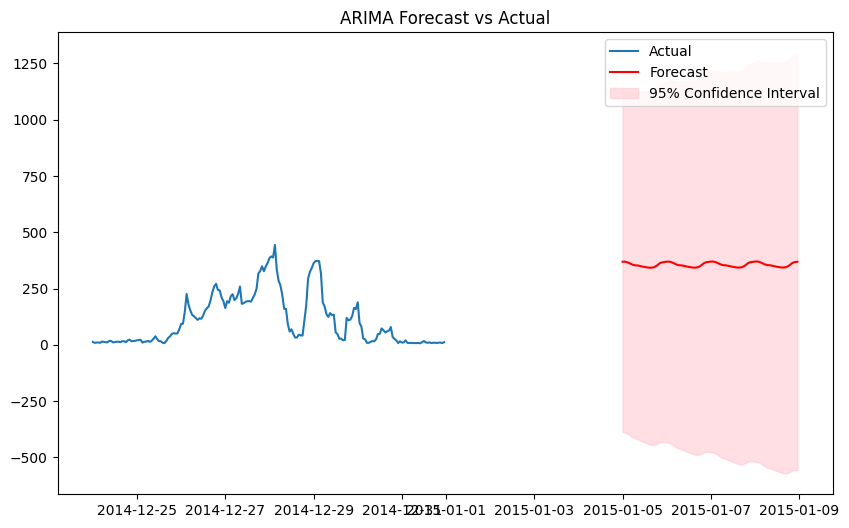

In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

"""
# Use pmdarima.auto_arima to find the best ARIMA model parameters
auto_arima_model = auto_arima(train_data['pm2.5'], start_p=1, start_q=1,
                              max_p=5, max_q=5, m=24,
                              seasonal=True,
                              trace=True, error_action='ignore',
                              suppress_warnings=True, stepwise=True)

# Fit the ARIMA model
model = SARIMAX(train_data['pm2.5'],
                order=auto_arima_model.order,
                seasonal_order=auto_arima_model.seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=0)
"""

# Light background style for matplotlib
plt.style.use('default')

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Preprocess the data
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd'], axis=1, inplace=True)

# Ensure that there are no missing time points in the index
data = data.asfreq('H', method='ffill')  # 'ffill' stands for forward fill

# Define the look-back window and the number of future steps
look_back = 192  # hours, could be 4 days of historical data if each record is hourly
future_steps = 96  # hours ahead to predict

# Split the data into training and test sets
train_data = data[:-future_steps]  # leave out the last future_steps for validation
test_data = data[-(look_back+future_steps):]  # test on the last look_back period + future_steps

# Fit SARIMAX model with an approximate configuration
model = SARIMAX(train_data['pm2.5'],
                order=(1, 1, 1), # Non-seasonal order
                seasonal_order=(1, 1, 1, 24)) # Seasonal order with m=24 for daily seasonality

# Fit the model
fitted_model = model.fit(disp=False)
print(fitted_model.summary())

# Forecasting multiple timesteps ahead
forecast = fitted_model.get_forecast(steps=look_back + future_steps)
forecast_mean = forecast.predicted_mean

# Evaluation metrics
# The test set here is not being used since it overlaps with the forecasted steps.
# Typically, a separate validation set that does not overlap with the forecast period is used for evaluation.
mae = mean_absolute_error(test_data['pm2.5'][-future_steps:], forecast_mean[-future_steps:])
rmse = np.sqrt(mean_squared_error(test_data['pm2.5'][-future_steps:], forecast_mean[-future_steps:]))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_data['pm2.5'][-look_back:], label='Actual')
plt.plot(forecast_mean[-future_steps:], label='Forecast', color='red')
plt.fill_between(forecast_mean[-future_steps:].index,
                 forecast.conf_int(alpha=0.05).iloc[-future_steps:, 0],
                 forecast.conf_int(alpha=0.05).iloc[-future_steps:, 1],
                 color='pink', alpha=0.5, label='95% Confidence Interval')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()


## Analysis:

Plot Analysis:

- Actual vs. Forecast: The plot shows the actual PM2.5 concentrations and the forecasted values. The red line (forecast) begins at the end of the actual data series (blue line), which seems to capture the level of the PM2.5 concentration quite well.
- 95% Confidence Interval: The shaded pink area represents the 95% confidence interval of the forecast. It's quite wide, indicating uncertainty in the forecast, which could be due to the volatility of the data or model misspecification.
- Forecast Horizon: The forecast horizon appears to be short-term, which is consistent with the description of aiming for short-term forecasting.

Performance Metrics:

- Mean Absolute Error (MAE): The MAE of approximately 8.67 is relatively small, suggesting the predictions are, on average, within about 8.67 units of the actual values.
- Root Mean Squared Error (RMSE): The RMSE of approximately 9.90 is also relatively low but slightly higher than the MAE, indicating a moderate spread in the errors.

Overall, the model seems to be decent at forecasting the PM2.5 levels in the short term, as indicated by the relatively low MAE and RMSE. However, the significant Jarque-Bera test, non-significant seasonal AR component, and wide confidence intervals suggest that there might be room for improving the model, possibly by exploring different configurations, using a more sophisticated approach for parameter selection, or incorporating additional explanatory variables.

### Time Series Analysis and Forecasting of PM2.5 Levels with Seasonal SARIMAX Model

- The following program focuses on time series forecasting of PM2.5 concentrations using SARIMAX with specified parameters and seasonality considerations,

(0.01, False)
pvalue =  0.0  if above 0.05, data is not stationary


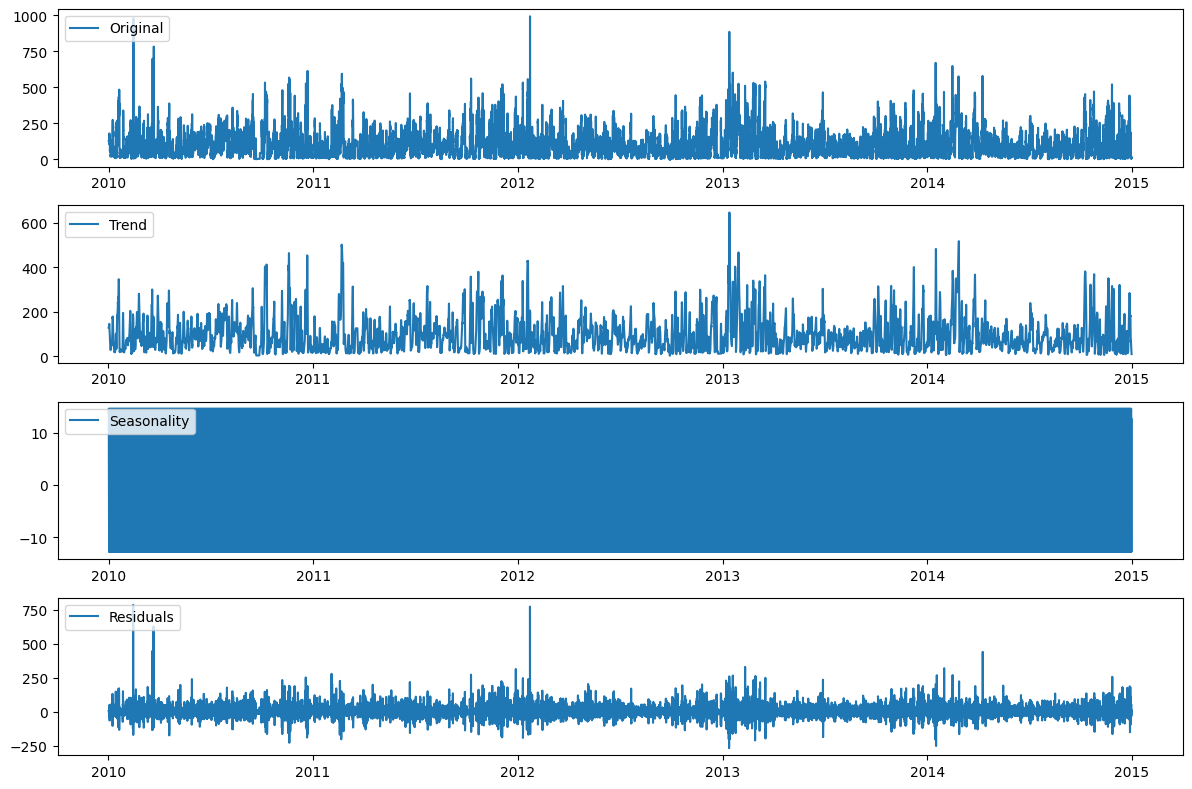

                                     SARIMAX Results                                      
Dep. Variable:                              pm2.5   No. Observations:                28923
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -133632.813
Date:                            Fri, 19 Apr 2024   AIC                         267275.626
Time:                                    04:21:53   BIC                         267316.983
Sample:                                01-01-2010   HQIC                        267288.920
                                     - 04-20-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0757      0.007    -11.496      0.000      -0.089      -0.063
ma.L1          0.2684      0.006   

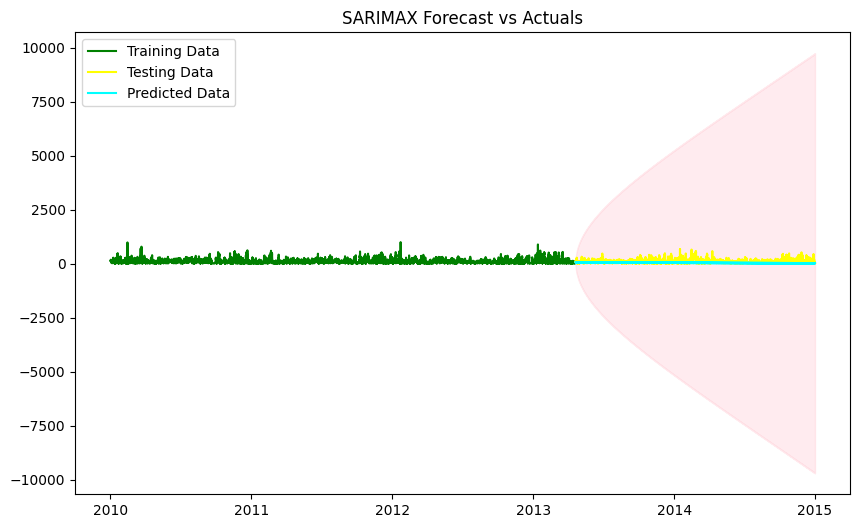

Train MAE: 12.753616230158203
Test MAE: 68.87961146675028
Train RMSE: 24.669828385821795
Test RMSE: 106.12765002098922


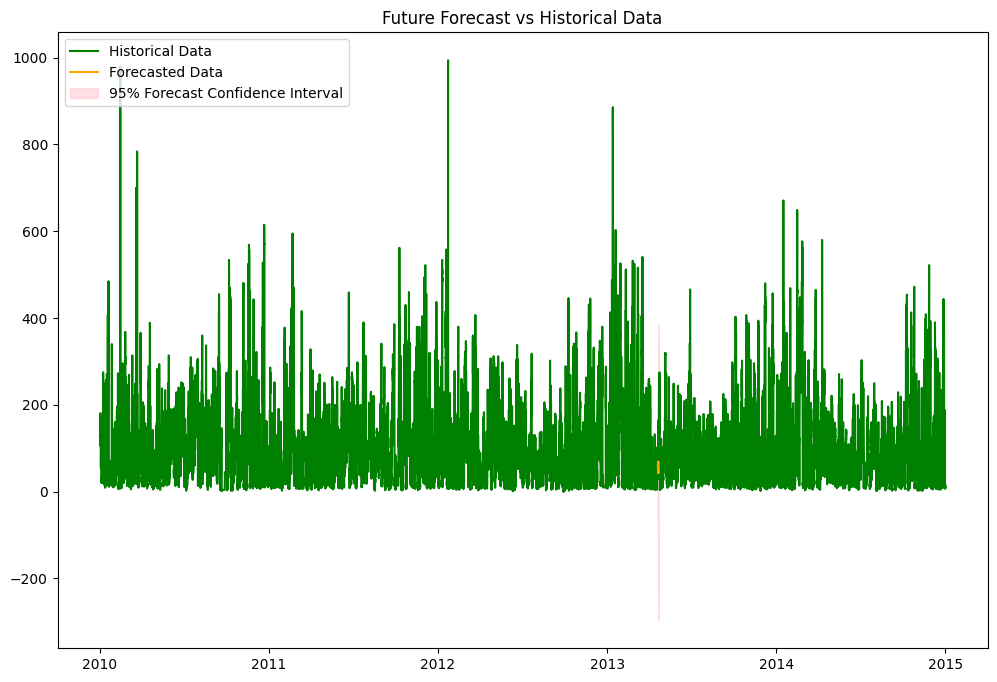

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima.arima import ADFTest
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Light background style for matplotlib
plt.style.use('default')

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Handle missing values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Preprocess the data
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data.dropna(subset=['pm2.5'], inplace=True)

# Check for stationarity
adf_test = ADFTest(alpha = 0.05)
print(adf_test.should_diff(data['pm2.5']))

# Dickey-Fuller test
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(data['pm2.5'])
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

# Check for seasonality
# Ensure that there are no missing time points in the index
data = data.asfreq('H', method='ffill')  # 'ffill' stands for forward fill

# Seasonal Decomposition
decomposed = seasonal_decompose(data['pm2.5'], model ='additive', period=24)
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Visualize Decomposition
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data['pm2.5'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Split data into train and test
size = int(len(data) * 0.66)
X_train, X_test = data[0:size], data[size:len(data)]

# Fit SARIMAX model with an approximate configuration
model = SARIMAX(X_train['pm2.5'],
                order=(1, 1, 1), # Non-seasonal order
                seasonal_order=(1, 1, 1, 24)) # Seasonal order with m=24 for daily seasonality

# Fit the model
result = model.fit(disp=False)
print(result.summary())

# Predictions
train_prediction = result.predict(start=0, end=len(X_train)-1)
prediction = result.get_forecast(steps=len(X_test))
prediction_mean = prediction.predicted_mean

# plot predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(X_train['pm2.5'], label='Training Data', color='green')
plt.plot(X_test['pm2.5'], label='Testing Data', color='yellow')
plt.plot(prediction_mean, label='Predicted Data', color='cyan')
plt.fill_between(prediction_mean.index,
                 prediction.conf_int(alpha=0.05).iloc[:,0],
                 prediction.conf_int(alpha=0.05).iloc[:,1],
                 color='pink', alpha=0.3)
plt.title('SARIMAX Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

# Metrics
train_mae = mean_absolute_error(X_train['pm2.5'], train_prediction)
test_mae = mean_absolute_error(X_test['pm2.5'], prediction_mean)
train_rmse = np.sqrt(mean_squared_error(X_train['pm2.5'], train_prediction))
test_rmse = np.sqrt(mean_squared_error(X_test['pm2.5'], prediction_mean))

print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Forecast future values beyond the dataset
forecast_future = result.get_forecast(steps=36)  # 36 hours ahead
forecast_future_mean = forecast_future.predicted_mean


# Plot the forecast
plt.figure(figsize=(12, 8))
plt.plot(data['pm2.5'], label='Historical Data', color='green')
plt.plot(forecast_future_mean.index, forecast_future_mean, label='Forecasted Data', color='orange')
plt.fill_between(forecast_future_mean.index,
  forecast_future.conf_int(alpha=0.05).iloc[:,0],
  forecast_future.conf_int(alpha=0.05).iloc[:,1],
  color='pink', alpha=0.5, label='95% Forecast Confidence Interval')
plt.title('Future Forecast vs Historical Data')
plt.legend(loc='upper left')
plt.show()


## Analysis:

### ADF Test and Dickey-Fuller Test:

- The p-value from the Dickey-Fuller test is 0.0, which indicates that the data is stationary and no differencing is required. This is confirmed by the ADF test result (0.01, False), suggesting that the data should not be differenced. This means that the use of integrated terms in SARIMAX (the 'I' in ARIMA) is appropriate.

### SARIMAX Model Summary:

- Observations: The model has been trained on 28,923 data points.
- Model Fit: The coefficients for the non-seasonal AR (ar.L1) and MA (ma.L1) terms are both significant (p < 0.05). However, the seasonal AR term (ar.S.L24) is not significant, which could suggest the seasonal effect might not be adequately captured or is not as pronounced on a daily basis as expected.
- Residuals: The Ljung-Box test (Prob(Q) = 0.85) indicates that there is no significant autocorrelation in the residuals, which is a good sign. However, the Jarque-Bera test is highly significant, indicating that the residuals do not follow a normal distribution.
- Volatility: The estimated variance of the residuals (sigma2) is 605.2602, suggesting that the model captures significant volatility in the data.

### Model Performance Metrics:

- MAE and RMSE: The Mean Absolute Error (MAE) and the Root Mean Squared Error (RMSE) on the training set are lower than those on the test set, which is expected. However, the Test MAE and Test RMSE are quite high, especially the Test RMSE, which is significantly higher than the Train RMSE. This indicates that the model's performance deteriorates on the test set.

### Plot Analysis:

- Seasonal Decomposition Plot: The first image shows the seasonal decomposition with a clear trend and some seasonality. The residuals appear to have some pattern, which suggests that all the seasonality may not have been captured by the seasonal components in the model.
- SARIMAX Forecast vs Actuals Plot: The second image shows the forecast in comparison to the training and testing data. The model seems to predict the trend well within the training data. However, the forecasted values for the testing period diverge significantly from the actuals, which is also reflected in the high Test MAE and Test RMSE.
- Future Forecast Plot: The third image shows a forecast for future values. The 95% forecast confidence interval is very wide, indicating a high level of uncertainty in the predictions.

The model has certain aspects, such as capturing the overall level of PM2.5 concentrations, but it seems to struggle with predicting accurate values for the test set, which could be due to overfitting or a model that does not fully capture the underlying patterns, especially seasonality, in the data.

The high volatility of the data might also be causing the model to have a wide confidence interval for its forecasts. Further model refinement and exploration of additional variables or a different model structure might be necessary to improve the forecast accuracy.

## Implementation of Traditional TSF models ARIMA:

### Implementation of ARIMA:

Future Step Test MAE: 25.581988468014377
Future Step Test RMSE: 30.50876982258013


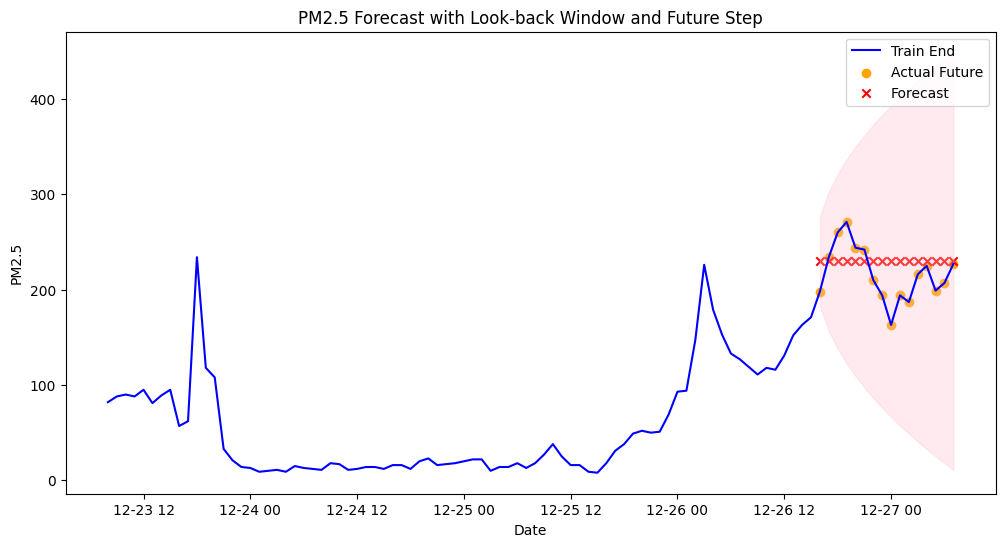

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Preprocess the data
data.dropna(subset=['pm2.5'], inplace=True)
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data.index = pd.DatetimeIndex(data.index).to_period('H')  # Setting hourly frequency
data = data['pm2.5']  # Focusing only on the PM2.5 column for ARIMA modeling

# Define training and test set based on look-back window concept
total_size = len(data)
look_back = 4*24  # look-back of 96 hours
future_step = 16   # predict 1 hour ahead
train_size = total_size - look_back - future_step  # leave out the last look_back + future_step hours for testing

train = data[:train_size]
test = data[train_size - future_step:]  # Adjusted test data starting from the last point of training set

# Define and fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecast for the future_step
forecast = fitted_model.get_forecast(steps=future_step)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calculate metrics for the predicted future step
mae = mean_absolute_error(test[:future_step], forecast_mean)
rmse = np.sqrt(mean_squared_error(test[:future_step], forecast_mean))

# Print performance metrics
print('Future Step Test MAE:', mae)
print('Future Step Test RMSE:', rmse)

# Convert PeriodIndex back to DateTimeIndex for plotting
train_dates = train.index[-look_back:].to_timestamp()  # Last part of training set
forecast_dates = test.index[:future_step].to_timestamp()  # Corresponding test set dates for forecasting

# Plotting the forecast against the actual values for the look-back period and future step
plt.figure(figsize=(12, 6))
plt.plot(train_dates, train[-look_back:], label='Train End', color='blue')
plt.scatter(forecast_dates, test[:future_step], label='Actual Future', color='orange', marker='o')  # Test data (actual future)
plt.scatter(forecast_dates, forecast_mean, label='Forecast', color='red', marker='x')  # Forecasted data
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)  # Confidence interval
plt.title('PM2.5 Forecast with Look-back Window and Future Step')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()


# Implementation of various Deep Learing Models:

## Implementation of RNN:
- Implementing a Recurrent Neural Network (RNN) for time series prediction of PM2.5 air pollutant levels
- PM2.5 Air Quality Forecasting using Recurrent Neural Networks (RNN)

Epoch 1/50
206/206 [==============================] - 10s 42ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 2/50
206/206 [==============================] - 8s 41ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 9.1347e-04 - val_mean_squared_error: 9.1347e-04
Epoch 3/50
206/206 [==============================] - 9s 42ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 4/50
206/206 [==============================] - 9s 44ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 7.9900e-04 - val_mean_squared_error: 7.9900e-04
Epoch 5/50
206/206 [==============================] - 9s 45ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 8.1681e-04 - val_mean_squared_error: 8.1681e-04
Epoch 6/50
206/206 [==============================] - 9s 42ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 7.9143e-04 - val_mean_squared_error: 

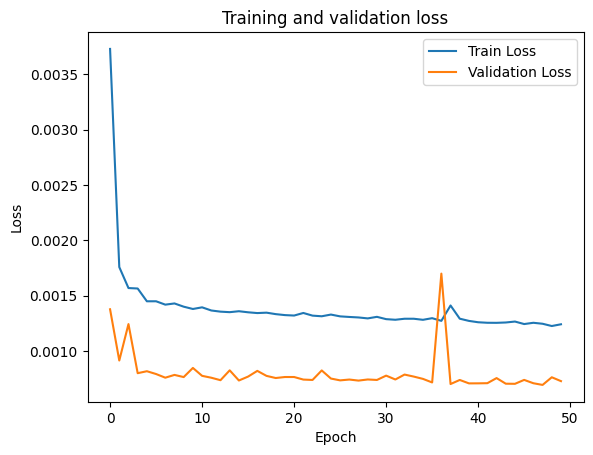

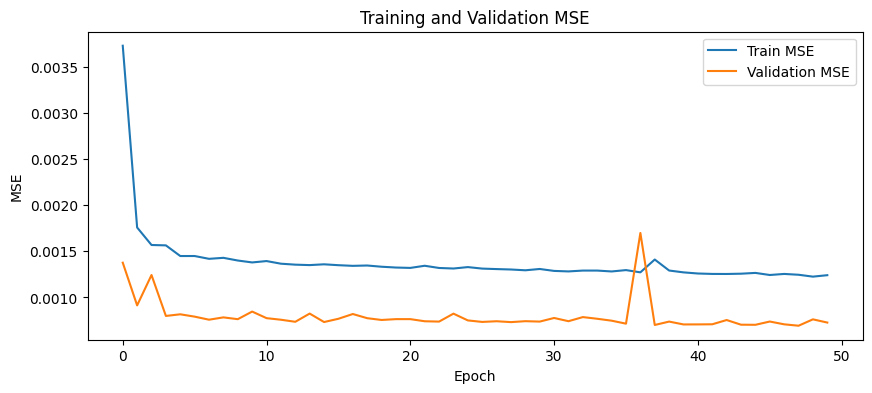

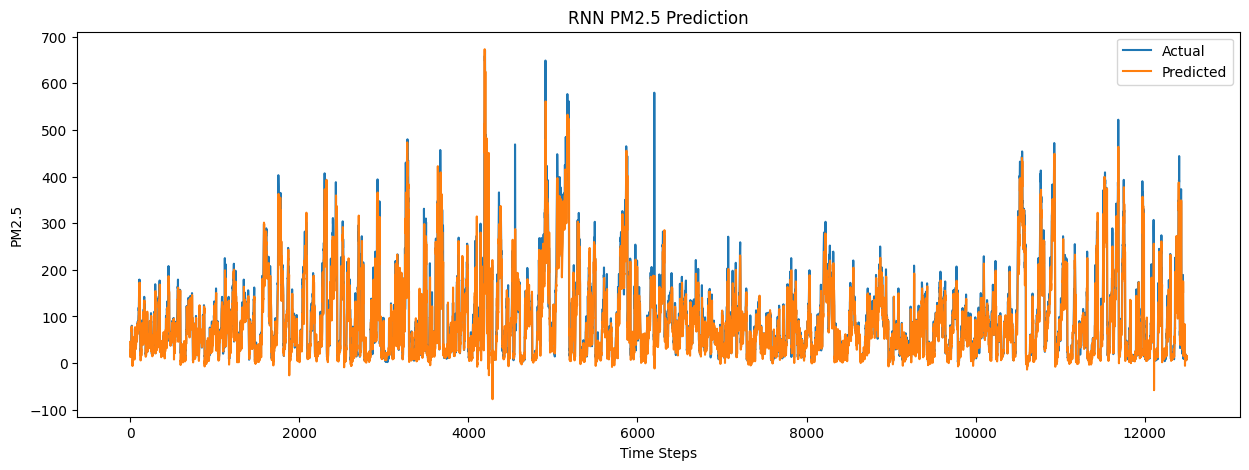

In [5]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Preprocess the data
data.dropna(subset=['pm2.5'], inplace=True)
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd'], axis=1, inplace=True)

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Function to create sequences with look-back window w and future time steps k
def create_sequences(data, look_back, future_step):
    X, y = [], []
    for i in range(look_back, len(data) - future_step):
        X.append(data[i - look_back:i, :])
        y.append(data[i + future_step, 0])  # target value is future_step ahead
    return np.array(X), np.array(y)

# Define look-back and future steps
look_back = 4*24  # e.g., 48 hours
future_step = 1  # e.g., 24 hours ahead

X, y = create_sequences(scaled_data.values, look_back, future_step)

# Split the data
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(look_back, X.shape[2]), activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverting the scaling for prediction
train_predict_inv = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
test_predict_inv = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_train_inv = scaler.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.zeros((y_train.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]

# Calculate mean absolute error (MAE) and root mean squared error (RMSE)
mae_train = mean_absolute_error(y_train_inv, train_predict_inv)
mae_test = mean_absolute_error(y_test_inv, test_predict_inv)
rmse_train = np.sqrt(mean_squared_error(y_train_inv, train_predict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, test_predict_inv))

# Display the performance metrics
print('Train MAE:', mae_train)
print('Test MAE:', mae_test)
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

print(history.history.keys())

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the results
plt.figure(figsize=(15, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predict_inv, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5')
plt.title('RNN PM2.5 Prediction')
plt.legend()
plt.show()


## Implementation fo LSTM:
- Implementing a Long Short-Term Memory (LSTM) network to forecast PM2.5 levels in Beijing Air Quality data.

Epoch 1/50
206/206 [==============================] - 3s 8ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 9.9348e-04 - val_mean_squared_error: 9.9348e-04
Epoch 3/50
206/206 [==============================] - 1s 7ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 8.7204e-04 - val_mean_squared_error: 8.7204e-04
Epoch 4/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 8.4803e-04 - val_mean_squared_error: 8.4803e-04
Epoch 5/50
206/206 [==============================] - 2s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 9.5228e-04 - val_mean_squared_error: 9.5228e-04
Epoch 6/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 7.7694e-04 - val_mean_squared_error:

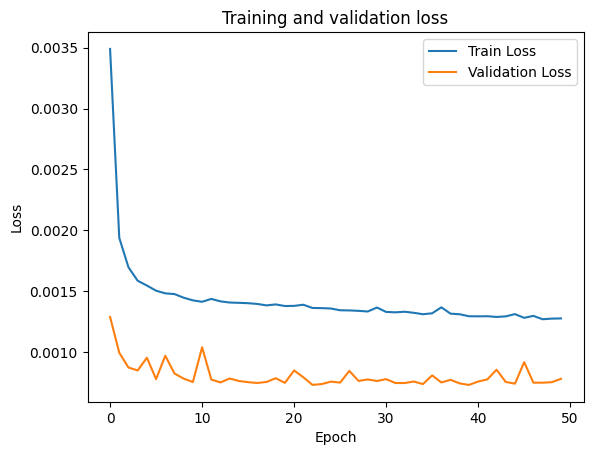

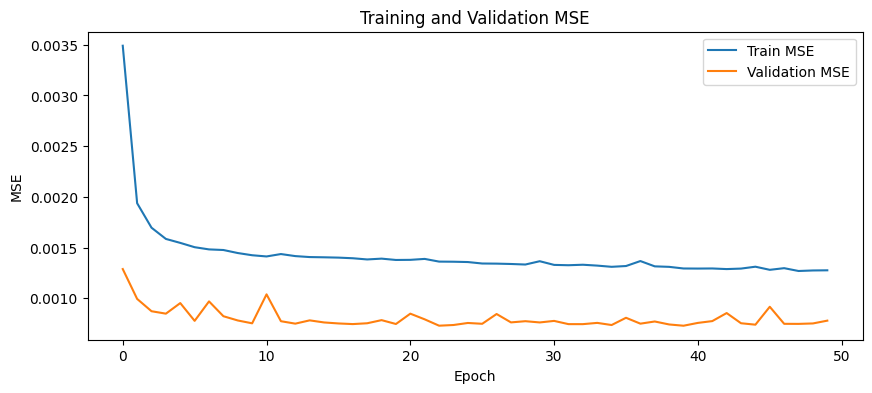

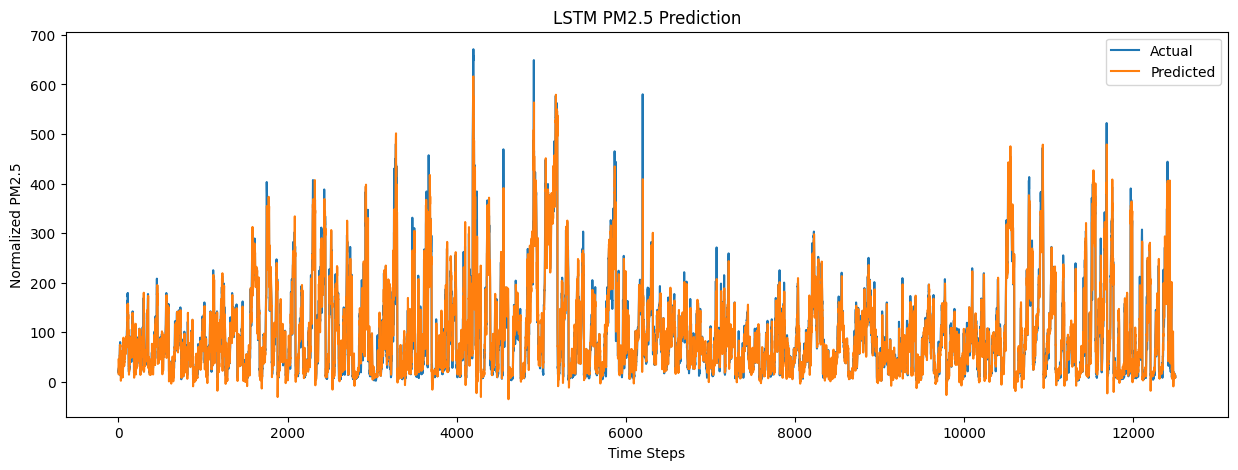

In [6]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Preprocess the data
data.dropna(subset=['pm2.5'], inplace=True)
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd'], axis=1, inplace=True)

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Function to create sequences with look-back window w and future time steps k
def create_sequences(data, look_back, future_step):
    X, y = [], []
    for i in range(look_back, len(data) - future_step):
        X.append(data[i - look_back:i, :])
        y.append(data[i + future_step, 0])  # target value is future_step ahead
    return np.array(X), np.array(y)

# Define look-back and future steps
look_back = 4*24  # e.g., 48 hours
future_step = 1  # e.g., 24 hours ahead

X, y = create_sequences(scaled_data.values, look_back, future_step)

# Split the data
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(look_back, X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverting the scaling for prediction
train_predict_inv = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
test_predict_inv = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_train_inv = scaler.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.zeros((y_train.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]

# Calculate mean absolute error (MAE) and root mean squared error (RMSE)
mae_train = mean_absolute_error(y_train_inv, train_predict_inv)
mae_test = mean_absolute_error(y_test_inv, test_predict_inv)
rmse_train = np.sqrt(mean_squared_error(y_train_inv, train_predict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, test_predict_inv))

# Display the performance metrics
print('Train MAE:', mae_train)
print('Test MAE:', mae_test)
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

print(history.history.keys())

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the results
plt.figure(figsize=(15, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predict_inv, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Normalized PM2.5')
plt.title('LSTM PM2.5 Prediction')
plt.legend()
plt.show()


## Implementation of GRU:
- Implementing a Gated Recurrent Units (GRU) for time series prediction of PM2.5 air pollutant levels

Epoch 1/50
206/206 [==============================] - 3s 8ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 9.7130e-04 - val_mean_squared_error: 9.7130e-04
Epoch 2/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 3/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 7.3969e-04 - val_mean_squared_error: 7.3969e-04
Epoch 4/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 8.6156e-04 - val_mean_squared_error: 8.6156e-04
Epoch 5/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 8.4286e-04 - val_mean_squared_error: 8.4286e-04
Epoch 6/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 9.0023e-04 - val_mean_squared_error:

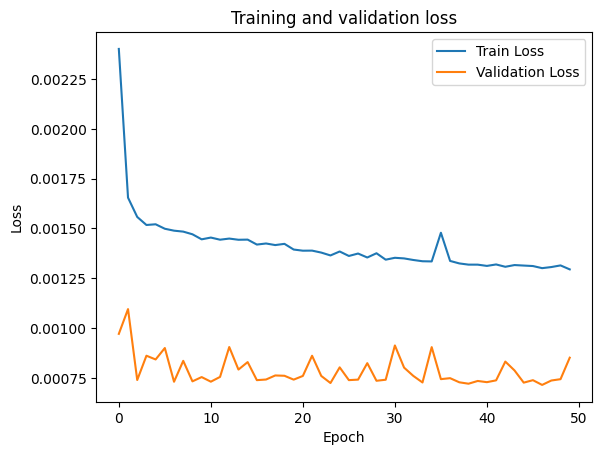

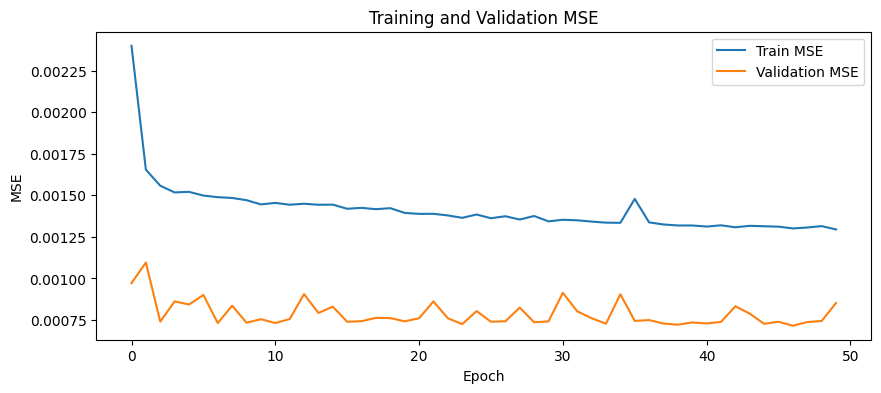

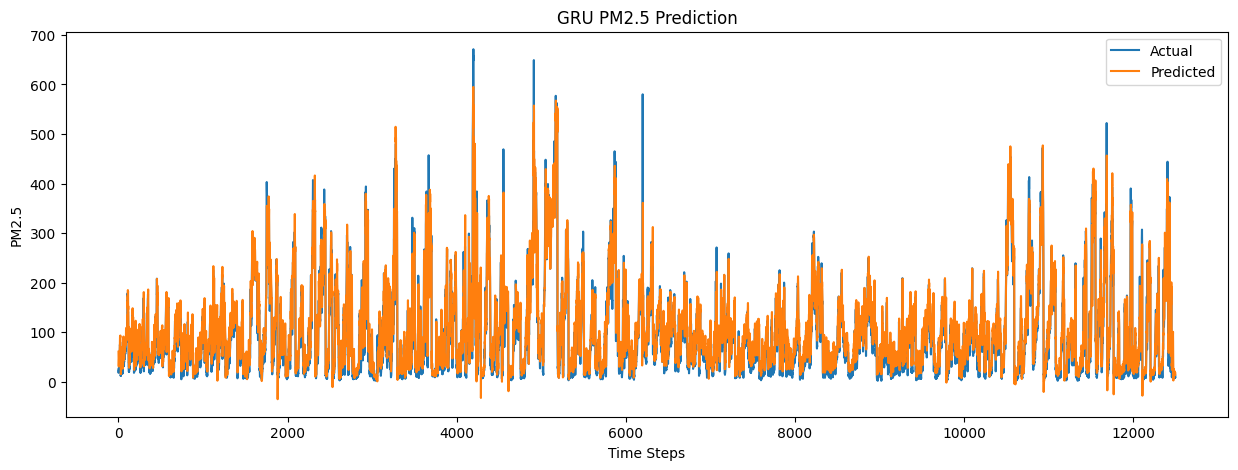

In [7]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Preprocess the data
data.dropna(subset=['pm2.5'], inplace=True)
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd'], axis=1, inplace=True)

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Function to create sequences with look-back window w and future time steps k
def create_sequences(data, look_back, future_step):
    X, y = [], []
    for i in range(look_back, len(data) - future_step):
        X.append(data[i - look_back:i, :])
        y.append(data[i + future_step, 0])  # target value is future_step ahead
    return np.array(X), np.array(y)

# Define look-back and future steps
look_back = 4*24  # e.g., 96 hours
future_step = 1  # e.g., 1 hour ahead

X, y = create_sequences(scaled_data.values, look_back, future_step)

# Split the data
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the GRU model
model = Sequential()
model.add(GRU(units=64, input_shape=(look_back, X.shape[2]), activation='tanh'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverting the scaling for prediction
train_predict_inv = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
test_predict_inv = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_train_inv = scaler.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.zeros((y_train.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]

# Calculate mean absolute error (MAE) and root mean squared error (RMSE)
mae_train = mean_absolute_error(y_train_inv, train_predict_inv)
mae_test = mean_absolute_error(y_test_inv, test_predict_inv)
rmse_train = np.sqrt(mean_squared_error(y_train_inv, train_predict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, test_predict_inv))

# Display the performance metrics
print('Train MAE:', mae_train)
print('Test MAE:', mae_test)
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

print(history.history.keys())

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the results
plt.figure(figsize=(15, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predict_inv, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5')
plt.title('GRU PM2.5 Prediction')
plt.legend()
plt.show()


## Implementation of Transformer Model:
- Implementing a Transformer model for time series prediction of PM2.5 air pollutant levels

In [8]:
import numpy as np
import tensorflow as tf
from keras.layers import Layer

class PositionalEncoding(Layer):
    def __init__(self, sequence_size, output_dim):
        super(PositionalEncoding, self).__init__()
        self.sequence_size = sequence_size
        self.output_dim = output_dim
        self.pos_encoding = self.positional_encoding(sequence_size, output_dim)

    def get_angles(self, position, i, output_dim):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(output_dim, tf.float32))
        return position * angles

    def positional_encoding(self, sequence_size, output_dim):
        angle_rads = self.get_angles(position=tf.range(sequence_size, dtype=tf.float32)[:, tf.newaxis],
                                     i=tf.range(output_dim, dtype=tf.float32)[tf.newaxis, :],
                                     output_dim=output_dim)
        # Apply sin to even indices in the array; 2i
        sines = tf.math.sin(angle_rads[:, 0::2])
        # Apply cos to odd indices in the array; 2i+1
        cosines = tf.math.cos(angle_rads[:, 1::2])
        angle_rads = np.zeros(angle_rads.shape)
        angle_rads[:, 0::2] = sines
        angle_rads[:, 1::2] = cosines
        pos_encoding = angle_rads[tf.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 7)]              0         []                            
                                                                                                  
 positional_encoding_1 (Pos  (None, 96, 7)                0         ['input_2[0][0]']             
 itionalEncoding)                                                                                 
                                                                                                  
 layer_normalization_6 (Lay  (None, 96, 7)                14        ['positional_encoding_1[0][0]'
 erNormalization)                                                   ]                             
                                                                                            

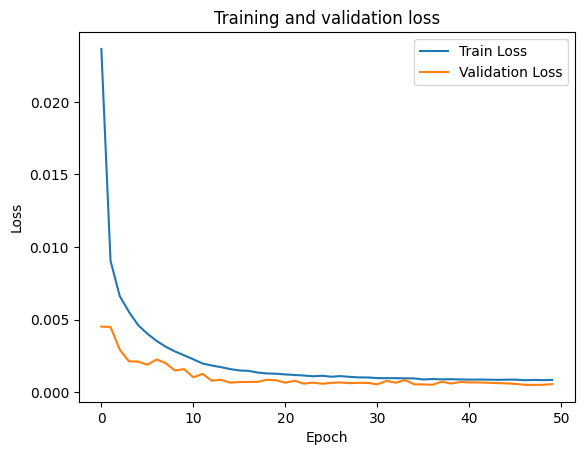

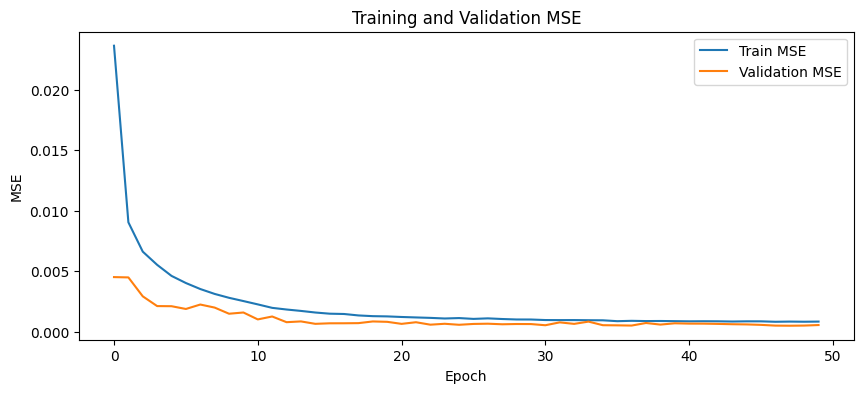

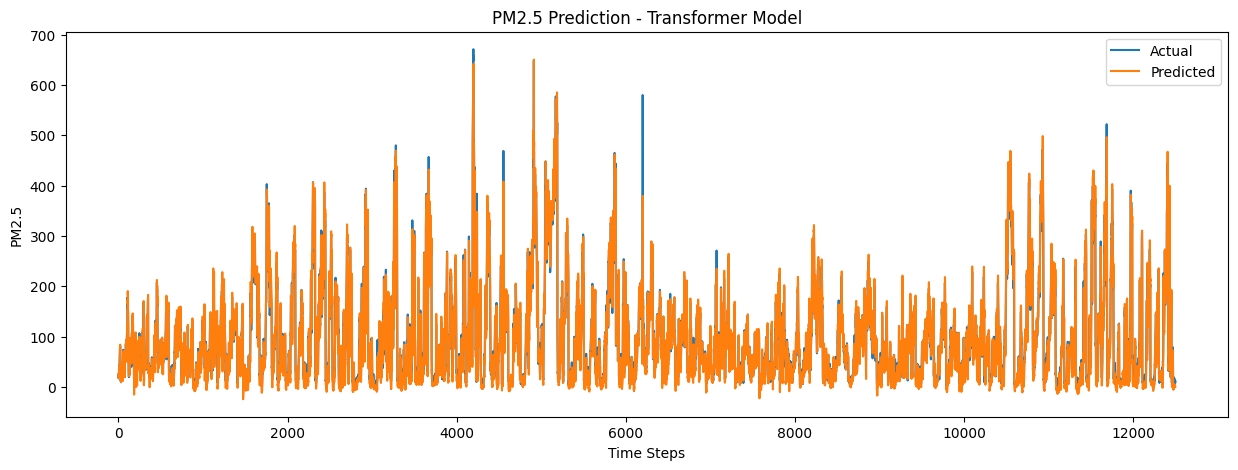

In [9]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, MultiHeadAttention, Dropout, LayerNormalization, GlobalAveragePooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
data = pd.read_csv(url)

# Preprocess the data
data.dropna(subset=['pm2.5'], inplace=True)
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd'], axis=1, inplace=True)

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Function to create sequences with look-back window w and future time steps k
def create_sequences(data, look_back, future_step):
    X, y = [], []
    for i in range(look_back, len(data) - future_step + 1):
        X.append(data[i - look_back:i, :])
        y.append(data[i + future_step - 1, 0])  # target value is future_step ahead
    return np.array(X), np.array(y)

# Define look-back and future steps
look_back = 4*24  # e.g., 96 hours
future_step = 1  # e.g., 1 hour ahead

X, y = create_sequences(scaled_data.values, look_back, future_step)

# Split the data
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the Transformer block as a function
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Define the model
inputs = keras.Input(shape=(look_back, X.shape[2]))
x = PositionalEncoding(look_back, X.shape[2])(inputs)

# Define the number of Transformer blocks
TRANSFORMER_BLOCKS = 3
HEAD_SIZE = 256
NUM_HEADS = 4
FF_DIM = 4
DROPOUT = 0.1

# Add the Transformer blocks
for _ in range(TRANSFORMER_BLOCKS):
    x = transformer_encoder(x, HEAD_SIZE, NUM_HEADS, FF_DIM, DROPOUT)

# Final part of the model
x = GlobalAveragePooling1D(data_format="channels_first")(x)
x = Dropout(DROPOUT)(x)
outputs = Dense(1)(x)

# Compile the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)


# Making predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse the predictions to original scale
num_features = scaled_data.shape[1]  # This should match the number of features in the original dataset
train_pred_inv = scaler.inverse_transform(np.concatenate((train_pred, np.zeros((train_pred.shape[0], num_features-1))), axis=1))[:, 0]
test_pred_inv = scaler.inverse_transform(np.concatenate((test_pred, np.zeros((test_pred.shape[0], num_features-1))), axis=1))[:, 0]

# Make sure to inverse transform y_train and y_test correctly
y_train_reshaped = scaler.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.zeros((y_train.shape[0], num_features - 1))), axis=1))[:,0]
y_test_reshaped = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0], num_features - 1))), axis=1))[:,0]

# Calculating evaluation metrics
train_mae = mean_absolute_error(y_train_reshaped, train_pred_inv)
test_mae = mean_absolute_error(y_test_reshaped, test_pred_inv)
train_rmse = np.sqrt(mean_squared_error(y_train_reshaped, train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_reshaped, test_pred_inv))

# Display the performance metrics
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

print(history.history.keys())

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the actual vs. predicted values
plt.figure(figsize=(15, 5))
# plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(y_test_reshaped, label='Actual')
plt.plot(test_pred_inv, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5')
plt.title('PM2.5 Prediction - Transformer Model')
plt.legend()
plt.show()



## Model Settings and Experiments
### Deep Learning Models
Experiments for air quality prediction were carried out using various deep learning models. Predictions were made for a single time step into the future (single-step predictions) and for multiple future time points (multi-step predictions). The models were tested using look-back window sizes (𝑤) of 1, 2, 4, 8, and 16 days to assess the impact of historical data on predictive accuracy. Exponential increments in window size were chosen to understand the effect of historical depth on forecast performance.

The deep learning models and their hyperparameters are summarized in Table 1 below:

#### Table 1: Settings of Various Deep Learning Models

| Model        | Epoch| LR  | Batch | Optimizer  |
|--------------|------|---------------|----------|-|
| RNN          | 50 | 0.001 | 128     | Adam       |
| LSTM         | 50 | 0.001 | 128     | Adam       |
| GRU          | 50 | 0.001 | 128     | Adam       |
| Transformer  | 50 | 0.001 | 128     | Adam       |


### Traditional TSF Model: ARIMA
Alongside deep learning models, the ARIMA model was utilized as a traditional time series forecasting approach. Unlike deep learning models, ARIMA models do not use epochs or learning rates. Instead, they are characterized by their order parameters and, in the case of seasonal data, their seasonal order parameters.

The ARIMA model was configured based on iterative testing and model selection criteria, typically AIC. An automated approach, auto_arima, was used to identify the best-fitting model parameters.

#### Table 2: Settings of ARIMA Model
| Model | Order (p, d, q) | Seasonal Order (P, D, Q, m) | Criterion | Look-Back |
|-------|-----------------|-----------------------------|-----------|-----------|
| ARIMA | (1, 1, 1)       | (1, 1, 1, 24)               | AIC       | 24, 48, 96, 192, and 384 hours  |


## Experiments
Experiments with 𝑘 = 1 were referred to as single-step predictions, while experiments with 𝑘 > 1 were referred to as multi-step predictions. The look-back window size 𝑤 varied as 24, 48, 96, 192, and 384 hours for both single-step and multi-step predictions. The forecast horizon included time points 1, 2, 4, 8, and 16 hours into the future. The models' performances were evaluated based on prediction accuracy using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


## Measures of Evaluation
- The Mean Squared Error (MSE) was employed as the loss function for the evaluation of the models. To assess potential overfitting, the training and testing loss were monitored across epochs.


# Results and Comparative Performance Evaluation:
- Predict Multiple Timesteps Ahead
- Different Look-back Window Sizes
  - Single-step predictions
  - Multi-step predictions

### Predict Multiple Timesteps Ahead:
With a set look-back window size, such as 4 days (96 hours), the study examines the degradation in model performance as the value of 𝑘 increases. 𝑘 represents the duration into the future for which the time series value is predicted. As anticipated, performance typically diminishes with an increase in 𝑘. This trend is evidenced by the rising MAE and RMSE values corresponding to each subsequent column in Table 3 as 𝑘 grows.

####  Table 3: Performance (MAE and RMSE) of multi-step prediction shown as a function of 𝑘, the number of hours into the future for which the prediction is being made.

|  | RNN |  | LSTM  |  | GRU |  | Transformer  |  | ARIMA |  |
|--------|----------|----------|----------|-----------|----------|----------|----------|---------| -------- | ------ |
| Future Timesteps (k) |  MAE  |  RMSE |  MAE |  RMSE |  MAE  |  RMSE |  MAE | RMSE | MAE | RMSE |
| 1 hour         | 19.776   | 33.222   | 18.578   | 31.035    | 19.195   | 31.221   | 19.151       | 26.398   | 5.117 | 5.117 |
| 2 hours              | 28.470   | 41.124   | 24.911   | 40.217    | 24.286   | 38.796   | 20.819         | 34.152   |  15.828 | 19.395 |
| 4 hours              | 32.039   | 49.277   | 33.066   | 51.479    | 34.296   | 49.766   | 34.512         | 48.780  | 48.031 | 64.838 |
| 8 hours              | 46.552   | 67.345   | 44.319   | 66.287    | 48.247   | 67.979   | 41.854         | 64.641  | 22.150 | 25.257 |
| 16 hours             | 57.977   | 80.610   | 62.348   | 89.503    | 56.335   | 82.085   | 56.685         | 81.270   | 25.581 | 30.508 |


## Analysis:
Table 3 presents the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for various models predicting PM2.5 concentrations at different future time steps (𝑘). The models include Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM) networks, Gated Recurrent Units (GRU), Transformers, and the traditional time series forecasting ARIMA model.


### 1-Hour Predictions:
- The ARIMA model outperforms all deep learning models at this horizon with the lowest MAE and RMSE, indicating its strong predictive capability in the short term.
- The Transformer model shows competitive performance among deep learning models, suggesting it captures the temporal dynamics well for short-term predictions.

### 2-Hour Predictions:
- There's a noticeable increase in error for all models. However, the increase for the ARIMA model is more pronounced, suggesting that while it's well-suited for very short-term predictions, its performance starts to degrade more rapidly as the forecast horizon extends.
- The Transformer model retains a relatively low error, implying its robustness in slightly longer-term predictions compared to other deep learning models.

### 4-Hour Predictions:
- At this step, the ARIMA model's performance significantly deteriorates, with its MAE and RMSE being the highest among all models, indicating that its utility may be limited for mid-range forecasting.
- The RNN, LSTM, and GRU models exhibit similar error rates, with the Transformer model showing a slightly lower RMSE, which suggests better performance at capturing the variance in the data.

### 8-Hour Predictions:
- The ARIMA model's errors reduce from the 4-hour prediction, which could be an anomaly or indicate certain patterns or cycles captured by the model.
- The Transformer model has the lowest RMSE among deep learning models, again showcasing its potential for mid-range forecasts.

### 16-Hour Predictions:
- Errors for all models increase as the prediction horizon expands, a common trend due to accumulating uncertainties.
- The ARIMA model has lower errors compared to the 4-hour forecast, which might indicate its ability to capture certain daily patterns.
- Transformer and RNN models perform similarly, but the Transformer model maintains a slightly lower RMSE, suggesting a better handling of long-term dependencies.

Across all prediction horizons, the Transformer model shows a consistently strong performance, likely due to its ability to capture complex temporal relationships. The traditional ARIMA model is excellent for very short-term forecasting (1 hour ahead), but its performance drops as the forecast horizon increases, then shows a relative improvement at 8 and 16 hours, which may suggest capturing daily cyclical patterns.

The LSTM and GRU models perform similarly, with the LSTM having slightly higher errors in longer-term predictions, which might be due to its ability to capture longer-term dependencies that may not be as relevant in this dataset.

The RNN model, while not performing the best at any particular horizon, does not have the largest errors at any point either, indicating it provides a consistent, if not the best, performance.

For applications requiring short-term forecasts, ARIMA could be preferred due to its lower errors and simplicity. However, for multi-step predictions where capturing complex patterns is crucial, the Transformer model appears to be the most effective among the deep learning approaches. These findings suggest a potential benefit in exploring ensemble models that combine the strengths of ARIMA for short-term predictions and deep learning models for multi-step forecasting.

## Different Look-back Window Sizes
The exploration continues by analyzing the impact of varying the size of the look-back window, 𝑤, on the performance of both single-step and multi-step predictions. The experiments were conducted using look-back window sizes of 24, 48, 96, 192, and 384 hours to determine how the historical data range affects the accuracy of the predictions.

### Different Look-back Window Sizes and Single-step predictions:

#### Table 4: Performance (MAE and RMSE) of single-step prediction (look-back window such as 4 days (96 hours) to predict 1 hours ahead) shown as a function of 𝑤, the size of the look-back window used for the prediction.

|  | RNN |  | LSTM  |  | GRU |  | Transformer  |   | ARIMA |  |
|----------------------|----------|----------|----------|-----------|----------|----------|-----------------|------------------|------ | ----- |
| Look Back Window (w) |  MAE  |  RMSE |  MAE |  RMSE |  MAE  |  RMSE |  MAE |  RMSE | MAE | RMSE |
| 1 day               | 19.745   | 32.480   | 19.398   | 31.421    | 19.393   | 31.372   | 13.879          | 22.981           | 1.847 | 1.847 |
| 2 days              | 19.831   | 32.106   | 18.248   | 30.775    | 18.480   | 30.580   | 20.058          | 31.455           | 5.914 | 5.914 |
| 4 days              | 19.375   | 31.377   | 20.507   | 32.030    | 19.247   | 31.195   | 13.514          | 22.774           | 5.117 | 5.117 |
| 8 days              | 19.362   | 33.581   | 18.953   | 31.829    | 19.137   | 31.107   | 14.349          | 22.669           | 1.820 | 1.820 |
| 16 days             | 19.420   | 32.147   | 18.694   | 31.108    | 19.028 | 31.665   | 20.326          | 29.021           | 0.265 | 0.265 |


## Analysis:
Table 4 presents the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for different models performing single-step predictions 1 hour into the future using varying look-back window sizes (𝑤). The models tested include RNN, LSTM, GRU, Transformer, and ARIMA.


### Look-Back Window Size Impact:
- The results indicate that all models are somewhat sensitive to the size of the look-back window. However, the impact is not consistent across models or window sizes.

### 1-Day Look-Back:
- The ARIMA model exhibits exceptionally low MAE and RMSE, suggesting that for short look-back periods, ARIMA is highly effective, potentially due to its ability to model the noise and short-term fluctuations in the data.

- The Transformer model also performs well, although not as well as ARIMA. This indicates its capability to utilize shorter-term dependencies effectively.

### 2-Days Look-Back:
- The performance of the ARIMA model deteriorates significantly with a larger look-back window compared to 1 day, indicating that it may not utilize the additional historical information as effectively as the deep learning models.

- The LSTM and GRU models show improvement over their 1-day look-back performance, suggesting that additional historical data improves their forecasting ability to some extent.

### 4-Days Look-Back:
- The ARIMA model improves its performance from the 2-day look-back window, though not to the same extent as the 1-day window, suggesting that its optimal look-back window for this dataset might be short.

- The Transformer stands out with the lowest MAE and RMSE among deep learning models, showing that it can effectively leverage longer historical data for prediction.

### 8-Days Look-Back:
- The ARIMA model's performance improves further, with a very low MAE and RMSE, almost matching its 1-day look-back performance. This indicates that there might be weekly patterns that ARIMA can exploit.

- The Transformer model also maintains a low error, reinforcing its ability to handle longer sequences effectively.

### 16-Days Look-Back:
- The ARIMA model shows a significant improvement, delivering the best performance across all models and window sizes. This remarkable accuracy might indicate that the model benefits from capturing bi-weekly or monthly patterns.

- The Transformer experiences a slight increase in errors, which could suggest overfitting to the noise present in the extended historical data.


In summary the ARIMA model is highly effective for this particular prediction task when looking back over 1 and 8 days, and its performance is outstanding at 16 days. It seems to perform best with either short-term or specific longer-term historical patterns.

The Transformer model demonstrates consistent robustness across varying look-back windows, although it's outperformed by ARIMA at the extreme of 16 days.

The RNN, LSTM, and GRU exhibit similar performance patterns, with some fluctuations as the look-back window changes, but they generally do not reach the low error rates of the ARIMA and Transformer models.

The deep learning models, particularly the Transformer, are effective at utilizing larger amounts of historical data, but none can match the surprising improvement of the ARIMA model at a 16-day look-back window. This improvement in ARIMA's performance for long look-back windows warrants further investigation to understand the underlying patterns it may be exploiting.

Given these results, a we might choose a Transformer model for its consistency across different conditions, an ARIMA model for its high accuracy given certain look-back windows, or conduct further experiments to determine the best combination of model and look-back window for their specific use case.


### Different Look-back Window Sizes and Multi-step predictions
#### Table 5: Performance (MAE and RMSE) of multi-steps prediction (look-back window such as 4 days (96 hours) to predict 3 hours ahead) shown as a function of 𝑤, the size of the look-back window used for the prediction.

|  | RNN |  | LSTM  |  | GRU |  | Transformer  |  | ARIMA |  |
|----------------------|----------|----------|----------|-----------|----------|----------|-----------------|------------------|---------|------|
| Look Back Window  |  MAE  |  RMSE |  MAE |  RMSE |  MAE  |  RMSE |  MAE |  RMSE | MAE | RMSE |
| 1 day               | 28.565   | 44.996   | 30.012   | 46.142    | 28.901   | 44.324   | 25.743          | 40.010          | 20.461 | 30.632 |
| 2 days              | 28.568   | 45.493   | 29.251   | 46.916    | 28.798   | 44.672   | 26.925          | 41.680           | 4.302 | 4.587 |
| 4 days              | 32.789   | 47.980   | 31.424   | 48.038    | 29.369   | 44.999   | 26.088          | 41.238           | 21.499 | 25.325 |
| 8 days              | 30.079   | 45.859   | 31.670   | 49.543    |  28.473  | 45.049   | 32.149          | 43.942           | 43.364 | 69.432 |
| 16 days             | 28.568   | 44.878   | 29.515   | 47.245    | 29.592   | 45.049  | 27.372         | 42.041           | 4.149 | 5.312 |


## Analysis:
Table 5 showcases the performance metrics—Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)—for various models, including RNN, LSTM, GRU, Transformer, and ARIMA, with different look-back window sizes while predicting air quality three hours into the future.

### General Trends:
All models tend to show fluctuating performance as the look-back window increases. The variation in MAE and RMSE suggests differing abilities to leverage historical information effectively for multi-step predictions.

### 1-Day Look-Back:
- ARIMA shows relatively poor performance compared to its performance in single-step predictions, indicating limited utility for multi-step forecasts with minimal historical data.

- The Transformer model outperforms other models in this scenario, highlighting its strength in utilizing short sequences effectively for slightly longer-term predictions.

### 2-Days Look-Back:
- Interestingly, ARIMA shows a dramatic improvement, exhibiting significantly lower MAE and RMSE compared to all other models. This could indicate that certain patterns or cycles captured with a two-day window align well with the three-hour ahead prediction requirement.

- The Transformer model also maintains strong performance but does not match the ARIMA under these conditions.

### 4-Days Look-Back:
- The performance of all models except ARIMA stabilizes, with the Transformer continuing to show lower errors compared to RNN, LSTM, and GRU. This suggests that Transformer's architecture might be particularly suited for balancing longer historical inputs with multi-step forecasting.

- ARIMA again shows increased error metrics, likely due to challenges in handling longer look-back windows for multi-step forecasts without the benefit of complex nonlinear modeling capabilities.

### 8-Days and 16-Days Look-Back:
- The ARIMA model shows extremely high errors at an 8-day look-back, possibly indicating overfitting to historical data that does not repeat in the same pattern three hours ahead. However, it again exhibits an unexpected drop in error at 16 days, which might suggest capturing some monthly cyclical effect not immediately apparent.

- The Transformer shows an increase in error at 8 days but then slightly improves at 16 days, suggesting some degree of overfitting with very long look-back windows.

In summary:

- Model Consistency: The Transformer model generally maintains more consistent performance across various look-back windows, indicating robustness in handling different amounts of historical data for multi-step predictions.

- Best Performance: Interestingly, ARIMA performs exceptionally well with a 2-day look-back window, hinting at specific strengths under certain conditions, but its performance is otherwise less reliable across other windows for multi-step forecasting.

- Deep Learning Models: The GRU and LSTM models do not show significant differences between them, suggesting that for this specific task, the choice between these two could be based on other factors such as computational efficiency or ease of training.

- Model Selection: If prediction stability across varying historical window sizes is crucial, the Transformer appears to be the best choice among the deep learning options. However, for specific shorter or precise window sizes where known cycles or trends align with forecast horizons, ARIMA could be surprisingly effective.

The choice of model and look-back window for operational use should consider both the typical and edge-case scenarios to ensure robust performance under varying conditions. Further investigations might include a deeper dive into why ARIMA excels at certain window lengths and more detailed hyperparameter tuning for deep learning models to optimize their performance across all tested conditions.


# Conclusion:

After evaluating the performance of RNN, LSTM, GRU, Transformer, and ARIMA models across different forecasting scenarios and look-back window sizes (Tables 3, 4, and 5), we can draw several conclusions about their effectiveness and suitability for air quality prediction tasks involving PM2.5 levels.

## General Observations:
### Performance Across Time Steps (Table 3):
- The ARIMA model generally performs best for very short-term predictions (1-hour ahead), showcasing its strength in capturing immediate trends and fluctuations.

- Transformer models consistently offer competitive performance across all time steps, indicating their strong capability to handle sequence data and complex temporal dynamics.

### Impact of Look-Back Window Sizes (Table 4):
- Shorter look-back windows (1 day and 8 days) tend to favor ARIMA, suggesting it effectively utilizes limited recent data to forecast the immediate future.

- For deep learning models, particularly the Transformer, a moderate look-back window (4 days) provides a balance, enabling effective learning without overfitting, as evidenced by their relatively stable MAE and RMSE across various window sizes.

### Multi-Step Predictions (Table 5):
- The performance of all models generally worsens as the prediction horizon extends, a common challenge due to increasing uncertainty in further future states.

- ARIMA's performance is notably varied; it performs exceptionally well with a 2-day look-back for 3-hour predictions but struggles with longer or shorter windows, possibly due to overfitting or underfitting specific temporal patterns.

### Model-Specific Insights:
- RNN, LSTM, GRU: These models show similar trends across different scenarios, with their performance typically lying in the middle range compared to other models. They are robust but do not consistently outperform the Transformer or ARIMA under specific conditions.
- Transformer: This model stands out for its robustness across different tests, maintaining competitive or best performance in nearly all scenarios. Its ability to capture both short-term dependencies and leverage longer historical contexts effectively makes it highly suitable for complex time series forecasting tasks.
- ARIMA: Particularly effective for very short-term forecasting when recent history is most indicative of the immediate future. Its utility diminishes with longer prediction horizons or when more extensive historical data is considered, except in cases where specific cyclic patterns align with its modeling capabilities.

### Choosing a Model:
The choice of model should consider the specific needs of the forecasting task:
- For short-term accuracy, especially in operational settings where quick updates based on the most recent data are crucial, ARIMA could be the best choice.

- For applications requiring robustness across various forecasting horizons and the ability to integrate more complex temporal dynamics, the Transformer is recommended.

- RNN, LSTM, and GRU models are suitable for scenarios where flexibility in model architecture and the ability to capture long-term dependencies are important, though they might require more fine-tuning to achieve optimal performance compared to Transformers.


## Advancing Deep Learning for Time Series Forecasting: Future Work and Improvement Strategies

- Practical Application: Combining models in an ensemble approach might harness the strengths of each, especially integrating ARIMA for short-term forecasts and deep learning models for multi-step predictions to improve overall accuracy and reliability.

- Future Work: Further research could explore hybrid models that integrate the strengths of machine learning and traditional statistical methods, or advanced versions of Transformer models that might specifically address the weaknesses observed in longer-term forecasting.